In [3]:
# Package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import data
train_df = pd.read_csv('final_train.csv')
test_df  = pd.read_csv('final_test.csv')

### Data visualization

Text(0.5, 1.0, 'result distribution')

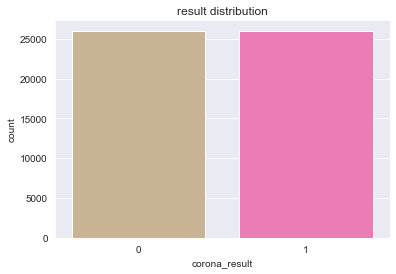

In [5]:
sns.set_style('darkgrid')
color = ["tan", "hotpink"]

sns.countplot(train_df['corona_result'], palette = color)
plt.title('result distribution')

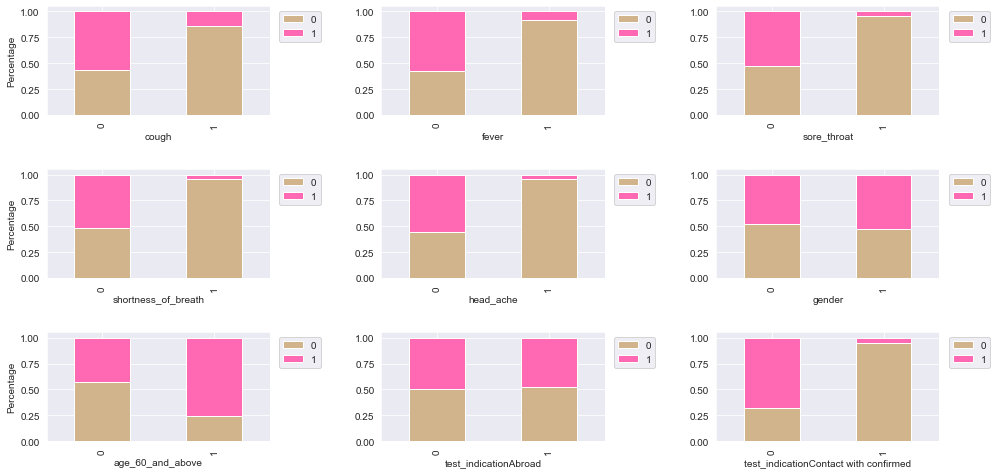

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
# fig.suptitle('Turnover rate', fontsize = 16)

cross_tab_prop = pd.crosstab(index=train_df['cough'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[0, 0], kind='bar', stacked=True, color = color)
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['fever'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[0, 1], kind='bar', stacked=True, color = color)
axes[0, 1].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['sore_throat'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[0, 2], kind='bar', stacked=True, color = color)
axes[0, 2].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['shortness_of_breath'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[1, 0], kind='bar', stacked=True, color = color)
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['head_ache'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[1, 1], kind='bar', stacked=True, color = color)
axes[1, 1].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['gender'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[1, 2], kind='bar', stacked=True, color = color)
axes[1, 2].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['age_60_and_above'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[2, 0], kind='bar', stacked=True, color = color)
axes[2, 0].set_ylabel('Percentage')
axes[2, 0].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['test_indicationAbroad'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[2, 1], kind='bar', stacked=True, color = color)
axes[2, 1].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

cross_tab_prop = pd.crosstab(index=train_df['test_indicationContact with confirmed'], columns=train_df['corona_result'], normalize="index")
cross_tab_prop.plot(ax = axes[2, 2], kind='bar', stacked=True, color = color)
axes[2, 2].legend(fontsize = 10, bbox_to_anchor=(1.25,1), loc='upper right')

### Some preperation work

In [7]:
train_df.drop(['sore_throat', 'shortness_of_breath', 'head_ache'], axis = 1, inplace = True)
test_df.drop(['sore_throat', 'shortness_of_breath', 'head_ache'], axis = 1, inplace = True)

In [8]:
train_df['gender'].replace(['male', 'female'], [0, 1], inplace = True)
train_df['corona_result'].replace(['positive', 'negative'], [0, 1], inplace = True)
test_df['gender'].replace(['male', 'female'], [0, 1], inplace = True)
test_df['corona_result'].replace(['positive', 'negative'], [0, 1], inplace = True)

In [9]:
train_X = train_df.drop('corona_result', axis = 1)
train_Y = train_df['corona_result'].to_frame()
test_X = train_df.drop('corona_result', axis = 1)
test_Y = train_df['corona_result'].to_frame()

### Prediction

In [10]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(train_X, train_Y)
log_preds = log_model.predict(test_X)
print('Accuracy for logistic regression: %.4f' %accuracy_score(test_Y, log_preds))
print('percision for logistic regression: %.4f' %precision_score(test_Y, log_preds))
print('Recall for logistic regression: %.4f' %recall_score(test_Y, log_preds))
print('f1 score for logistic regression: %.4f' %f1_score(test_Y, log_preds))

Accuracy for logistic regression: 0.8375
percision for logistic regression: 0.7784
Recall for logistic regression: 0.9435
f1 score for logistic regression: 0.8531


In [11]:
# ROC and AUC

from sklearn.metrics import roc_curve, auc

log_probs = log_model.predict_proba(test_X)[:, 1]


log_fpr, log_tpr, log_thresholds = roc_curve(test_Y, log_preds)


log_auc = auc(log_fpr, log_tpr)

In [12]:
log_auc

0.8374807692307692

In [13]:
# ppv

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

log_probs = log_model.predict_proba(test_X)[:, 1]

log_precision, log_recall, _ = precision_recall_curve(test_Y, log_probs)

log_f1, log_auc = f1_score(test_Y, log_preds), auc(log_recall, log_precision)

print('log: f1=%.3f auc=%.3f' % (log_f1, log_auc))

log: f1=0.853 auc=0.857


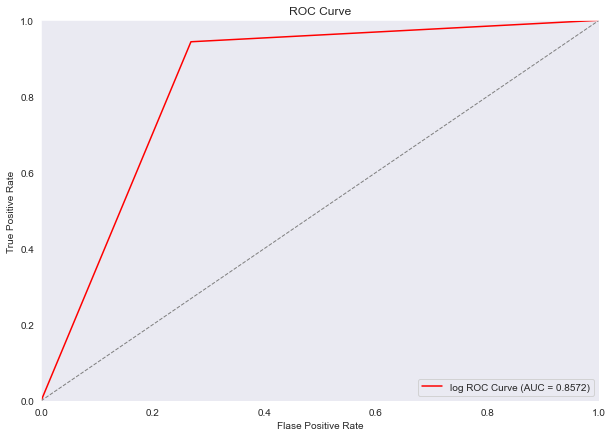

In [14]:
plt.figure(figsize = (10, 7))


plt.plot(
    log_fpr, log_tpr, color = 'red', label ='log ROC Curve (AUC = %.4f)' %log_auc
)
plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

In [16]:
test_Y_CI = test_Y.values

In [17]:
roc_auc_ci(test_Y_CI, log_preds, positive = 1)

(0.8340199143561171, 0.8409416241054213)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 0
best_score = 0
best_p = 0
best_method = ''

for method in ['uniform', 'distance']:
    for k in range(1, 5):
        for p in range(1, 5):
            knn_clf = KNeighborsClassifier(k)
            knn_clf.fit(train_X, train_Y)
            score = knn_clf.score(test_X, test_Y)
            if score > best_score:
                best_p = p
                best_method = method
                best_score = score
                best_k = k
print(best_method)
print(best_k)
print(best_p)
print(best_score)

uniform
3
1
0.8179038461538461


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', p = 1)
knn_model.fit(train_X, train_Y)
knn_preds = knn_model.predict(test_X)
print('Accuracy for K-Nearest Neighbors: %.4f' %accuracy_score(test_Y, knn_preds))
print('percision for K-Nearest Neighbors: %.4f' %precision_score(test_Y, knn_preds))
print('Recall for K-Nearest Neighbors: %.4f' %recall_score(test_Y, knn_preds))
print('f1 score for K-Nearest Neighbors: %.4f' %f1_score(test_Y, knn_preds))

Accuracy for K-Nearest Neighbors: 0.8179
percision for K-Nearest Neighbors: 0.7902
Recall for K-Nearest Neighbors: 0.8657
f1 score for K-Nearest Neighbors: 0.8262


In [20]:
# ROC and AUC

from sklearn.metrics import roc_curve, auc

knn_probs = knn_model.predict_proba(test_X)[:, 1]

knn_fpr, knn_tpr, knn_thresholds = roc_curve(test_Y, knn_preds)

knn_auc = auc(knn_fpr, knn_tpr)

In [21]:
# ppv

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

knn_probs = knn_model.predict_proba(test_X)[:, 1]

knn_precision, knn_recall, _ = precision_recall_curve(test_Y, knn_probs)

knn_f1, knn_auc = f1_score(test_Y, knn_preds), auc(knn_recall, knn_precision)

print('log: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

log: f1=0.826 auc=0.852


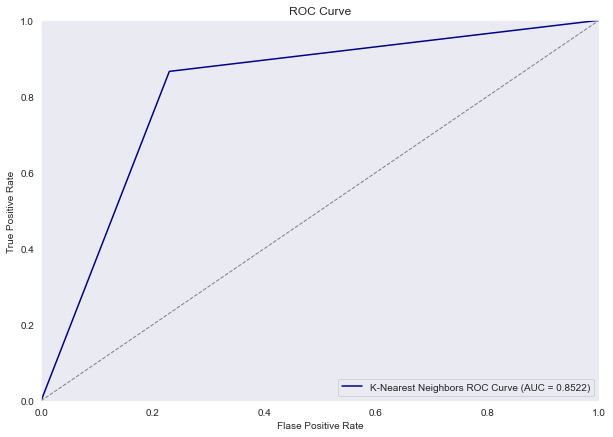

In [22]:
plt.figure(figsize = (10, 7))


plt.plot(
    knn_fpr, knn_tpr, color = 'navy', label ='K-Nearest Neighbors ROC Curve (AUC = %.4f)' %knn_auc
)

plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
roc_auc_ci(test_Y_CI, knn_preds, positive = 1)

(0.8142581468629969, 0.8215495454446954)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1)
rf_model.fit(train_X, train_Y)
rf_preds = rf_model.predict(test_X)
print('Accuracy for SVM: %.4f' %accuracy_score(test_Y, rf_preds))
print('percision for SVM: %.4f' %precision_score(test_Y, rf_preds))
print('Recall for SVM: %.4f' %recall_score(test_Y, rf_preds))
print('f1 score for SVM: %.4f' %f1_score(test_Y, rf_preds, average = 'weighted'))

Accuracy for SVM: 0.8468
percision for SVM: 0.7880
Recall for SVM: 0.9490
f1 score for SVM: 0.8452


In [30]:
# ROC and AUC

from sklearn.metrics import roc_curve, auc

rf_probs = rf_model.predict_proba(test_X)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_Y, rf_preds)

rf_auc = auc(rf_fpr, rf_tpr)

In [31]:
# ppv

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

rf_probs = rf_model.predict_proba(test_X)[:, 1]

rf_precision, rf_recall, _ = precision_recall_curve(test_Y, rf_probs)

rf_f1, rf_auc = f1_score(test_Y, rf_preds), auc(rf_recall, rf_precision)

print('log: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

log: f1=0.861 auc=0.879


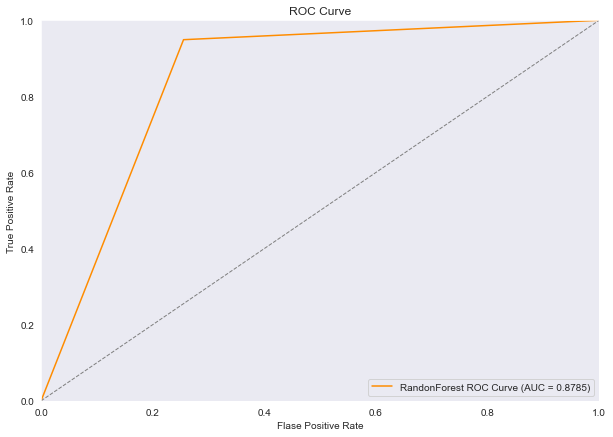

In [32]:
plt.figure(figsize = (10, 7))


plt.plot(
    rf_fpr, rf_tpr, color = 'darkorange', label ='RandonForest ROC Curve (AUC = %.4f)' %rf_auc
)

plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
roc_auc_ci(test_Y_CI, rf_preds, positive = 1)

(0.8434797713201145, 0.8502125363721931)

In [38]:
from sklearn.svm import SVC

svm_model = SVC(C = 1, kernel = 'rbf', probability=True)
svm_model.fit(train_X, train_Y)
svm_preds = svm_model.predict(test_X)
print('Accuracy for SVM: %.4f' %accuracy_score(test_Y, svm_preds))
print('percision for SVM: %.4f' %precision_score(test_Y, svm_preds))
print('Recall for SVM: %.4f' %recall_score(test_Y, svm_preds))
print('f1 score for SVM: %.4f' %f1_score(test_Y, svm_preds, average = 'weighted'))

Accuracy for SVM: 0.8376
percision for SVM: 0.7831
Recall for SVM: 0.9338
f1 score for SVM: 0.8360


In [39]:
# ROC and AUC

from sklearn.metrics import roc_curve, auc

svm_probs = svm_model.predict_proba(test_X)[:, 1]

svm_fpr, svm_tpr, svm_thresholds = roc_curve(test_Y, svm_preds)

svm_auc = auc(svm_fpr, svm_tpr)

In [40]:
# ppv

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

svm_probs = svm_model.predict_proba(test_X)[:, 1]

svm_precision, svm_recall, _ = precision_recall_curve(test_Y, svm_probs)

svm_f1, svm_auc = f1_score(test_Y, svm_preds), auc(svm_recall, svm_precision)

print('log: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))

log: f1=0.852 auc=0.802


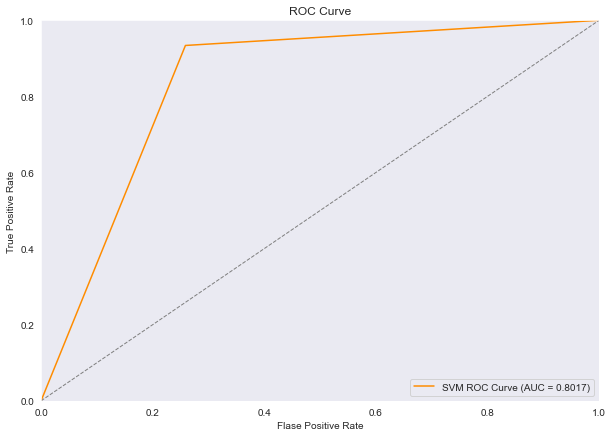

In [41]:
plt.figure(figsize = (10, 7))


plt.plot(
    svm_fpr, svm_tpr, color = 'darkorange', label ='SVM ROC Curve (AUC = %.4f)' %svm_auc
)

plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
roc_auc_ci(test_Y_CI, svm_preds, positive = 1)

(0.8340975968413975, 0.8410177877739873)

In [38]:
# LOG feature importance
from sklearn.inspection import permutation_importance

results = permutation_importance(log_model, train_X, train_Y, scoring='f1')

importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04403
Feature: 1, Score: 0.07775
Feature: 2, Score: 0.00002
Feature: 3, Score: 0.00399
Feature: 4, Score: 0.00180
Feature: 5, Score: 0.00111
Feature: 6, Score: 0.09901
Feature: 7, Score: 0.07881
Feature: 8, Score: -0.00035


In [39]:
# KNN feature importance

results = permutation_importance(knn_model, train_X, train_Y, scoring='f1')

importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06104
Feature: 1, Score: 0.08078
Feature: 2, Score: 0.00088
Feature: 3, Score: 0.00450
Feature: 4, Score: 0.01006
Feature: 5, Score: 0.00431
Feature: 6, Score: 0.07001
Feature: 7, Score: 0.07054
Feature: 8, Score: 0.00117


In [36]:
# RF feature importance

results = permutation_importance(rf_model, train_X, train_Y, scoring='f1')

importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06599
Feature: 1, Score: 0.08679
Feature: 2, Score: 0.00212
Feature: 3, Score: 0.00583
Feature: 4, Score: 0.00609
Feature: 5, Score: 0.00166
Feature: 6, Score: 0.12792
Feature: 7, Score: 0.07950
Feature: 8, Score: 0.00233


In [40]:
# SVM feature importance

results = permutation_importance(svm_model, train_X, train_Y, scoring='accuracy')

importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

KeyboardInterrupt: 

In [43]:
# ROC and AUC

from sklearn.metrics import roc_curve, auc

log_probs = log_model.predict_proba(test_X)[:, 1]
knn_probs = knn_model.predict_proba(test_X)[:, 1]
rf_probs = rf_model.predict_proba(test_X)[:, 1]
svm_probs = svm_model.predict_proba(test_X)[:, 1]

log_fpr, log_tpr, log_thresholds = roc_curve(test_Y, log_preds)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(test_Y, knn_preds)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_Y, rf_preds)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(test_Y, svm_preds)

log_auc = auc(log_fpr, log_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

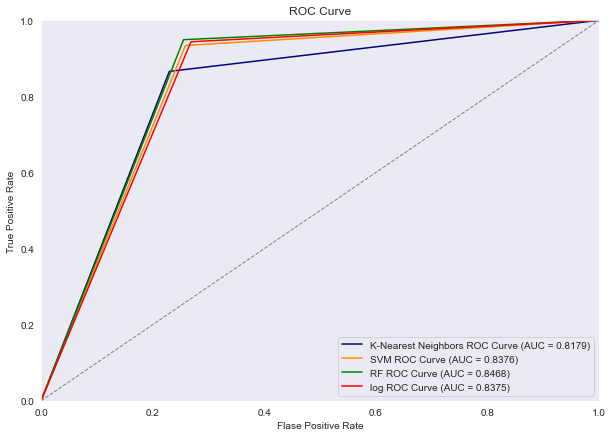

In [44]:
plt.figure(figsize = (10, 7))


plt.plot(
    knn_fpr, knn_tpr, color = 'navy', label ='K-Nearest Neighbors ROC Curve (AUC = %.4f)' %knn_auc
)
plt.plot(
    svm_fpr, svm_tpr, color = 'darkorange', label ='SVM ROC Curve (AUC = %.4f)' %svm_auc
)
plt.plot(
    rf_fpr, rf_tpr, color = 'green', label ='RF ROC Curve (AUC = %.4f)' %rf_auc
)
plt.plot(
    log_fpr, log_tpr, color = 'red', label ='log ROC Curve (AUC = %.4f)' %log_auc
)
plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
dfCopy = train_df.copy()

dfCopy.drop('corona_result',axis=1,inplace=True)

dfCopy

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,age_60_and_above,temperature,test_indicationAbroad,test_indicationContact with confirmed,test_indicationOther
0,0,0,0,0,0,0,0,29.5,0,0,1
1,0,0,0,0,0,1,0,22.5,0,0,1
2,0,0,0,0,0,1,0,19.5,0,0,1
3,0,0,0,0,0,1,1,22.5,0,0,1
4,0,0,0,0,1,1,0,22.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,1,0,28.0,0,0,1
49996,0,0,0,0,0,0,0,22.5,0,0,1
49997,0,0,0,0,0,1,0,22.5,0,1,0
49998,0,0,0,0,0,1,0,25.0,0,1,0


### Generate 'Cluster' variable

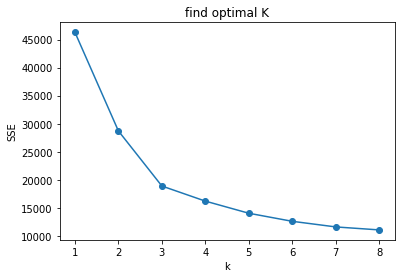

In [19]:
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(dfCopy)
    SSE.append(estimator.inertia_)
X = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('find optimal K')
plt.plot(X, SSE, 'o-')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 3).fit(dfCopy)

In [48]:
print(kmeans.labels_)

[0 1 2 ... 1 1 0]


In [39]:
train_df['Cluster'] = kmeans.labels_
train_df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,age_60_and_above,temperature,test_indicationAbroad,test_indicationContact with confirmed,test_indicationOther,Cluster
0,0,0,1,0,0,0,1,0,25.0,0,0,1,1
1,0,0,0,0,1,1,1,0,25.0,0,1,0,1
2,0,0,0,0,0,1,0,0,25.0,0,0,1,1
3,0,0,0,0,0,0,1,0,26.5,0,1,0,1
4,0,0,0,0,0,0,0,0,24.5,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0,0,0,0,0,1,0,0,25.0,0,0,1,1
51996,0,0,0,0,0,1,1,0,24.0,0,0,1,1
51997,0,1,0,0,0,0,0,0,18.5,0,1,0,2
51998,0,0,0,0,0,1,1,0,23.5,0,0,1,1


In [49]:
test_df['Cluster'] = kmeans.labels_
test_df.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,age_60_and_above,temperature,test_indicationAbroad,test_indicationContact with confirmed,test_indicationOther,Cluster
0,0,0,0,0,0,0,0,0,29.5,0,0,1,0
1,0,0,0,0,0,1,1,0,22.5,0,0,1,1
2,0,0,0,0,0,1,1,0,19.5,0,0,1,2
3,0,0,0,0,0,0,1,1,22.5,0,0,1,1
4,0,0,0,0,1,0,1,0,22.5,0,1,0,1
